<a href="https://colab.research.google.com/github/ssubbinn/ESAA-OB/blob/main/12%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 4. 합성곱 신경망(CNN)

### 1. 합성곱 신경망

합성곱 신경망 : 데이터가 가진 특징들의 패턴을 학습하는 알고리즘

이미지분류 / 객체 탐지 / 스타일 전이 

**1-1 이미지 표현**

- 흑백 이미지는 0~255 사이의 숫자로 각 픽셀의 화소 값을 나타내는 방식으로 표현
- 컬러 이미지는 rgb 채널로 구성된 3장의 이미지를 겹쳐서 표현

**1-2 합성곱**

- 합성곱 연산 : 입력 이미지에 대하여 일반적으로 정방형 크기를 가지는 커널 사용하여 이미지에 대한 특성 추출

- 이렇게 추출된 이미지를 특성맵이라고 함

**1-3 채널**

- 채널 : 입력 이미지를 구성하는 2차원 배열의 개수

- 흑백이미지는 채널 하나, 컬러 이미지는 채널 3개

**1-4 스트라이드**
- 합성곱 연산할때 이동하는 간격
- 텐서플로 케라스에서 제공하는 conv2d 레이어의 strides 매개변수에 스트라이드 지정가능

**1-5 패딩**

- 추출된 특성맵의 크기가 입력 이미지 대비 줄어들지 않도록 하는 것
- 입력 이미지의 가장 자리에 0으로 채움
- 텐서플로 케라스의 conv2d 레이어에서 padding=same으로 설정하면 zero padding임

**1-6 특성맵 사이즈**

**1-7 풀링**
- 풀링 레이어는 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어
- 연산량 감소와 과적합 방지 가능

- maxpooling, averagepooling

### 간단한 모델 생성

**2-1 데이터 로드 및 전처리 **

In [1]:
# tensorflow 모듈 import
import tensorflow as tf

In [2]:
# mnist 손글씨 이미지 데이터 로드
mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid)=mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


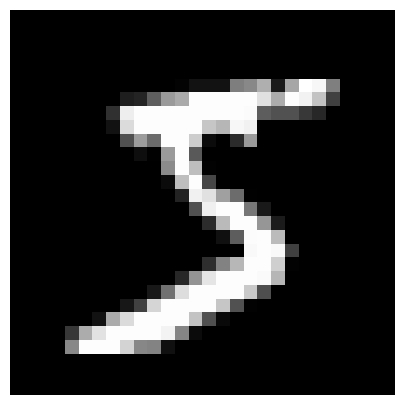

In [3]:

# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx], cmap='gray')
  plt.axis('off')
  plt.show()

plot_image(x_train, 0)

In [4]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [5]:
# 정규화
x_train=x_train/255.0
x_valid=x_valid/255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


색상 채널 추가

(60000,28,28) -> (60000,28,28,1)로 색상 채널 추가

tf.newaxis 이용

In [6]:
# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in=x_train[..., tf.newaxis]
x_valid_in=x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


**2-2 Sequential API로 모델 생성 및 학습**

In [7]:
# Sequential API를 사용해 샘플 모델 생성
model=tf.keras.Sequential([
    #Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='conv'),
    #max pooling 적용
    tf.keras.layers.MaxPooling2D((2,2), name='pool'),
    #classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2062 - accuracy: 0.9422 - val_loss: 0.0909 - val_accuracy: 0.9720
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0780 - accuracy: 0.9774 - val_loss: 0.0647 - val_accuracy: 0.9793
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0588 - accuracy: 0.9824 - val_loss: 0.0637 - val_accuracy: 0.9783
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0492 - accuracy: 0.9851 - val_loss: 0.0561 - val_accuracy: 0.9816
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0409 - accuracy: 0.9875 - val_loss: 0.0534 - val_accuracy: 0.9821
Epoch 6/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0353 - accuracy: 0.9891 - val_loss: 0.0527 - val_accuracy: 0.9834
Epoch 7/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0301 - accuracy: 0.9907 - val_loss: 0.0574 -

In [9]:
# evaluate도 하자
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 2s 6ms/step - loss: 0.0598 - accuracy: 0.9821


[0.059759318828582764, 0.9821000099182129]

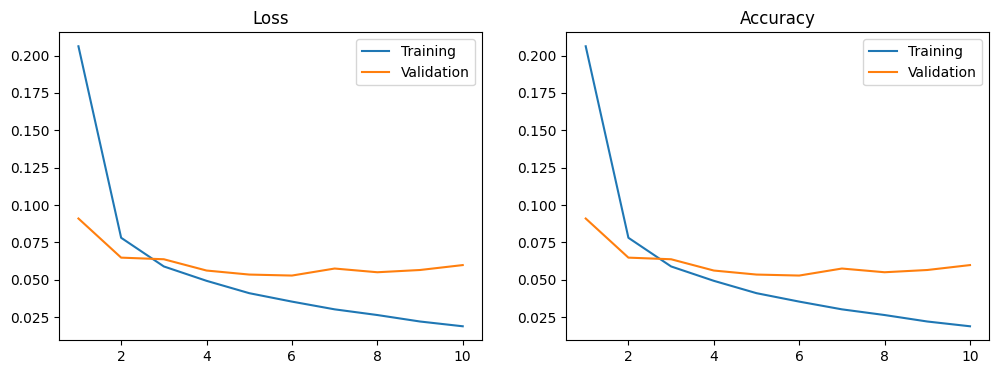

In [10]:
def plot_loss_acc(history, epoch):
  loss, val_loss=history.history['loss'], history.history['val_loss']
  acc, val_acc=history.history['accuracy'], history.history['val_accuracy']

  fig, axes=plt.subplots(1, 2, figsize=(12, 4))

  axes[0].plot(range(1, epoch+1), loss, label='Training')
  axes[0].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[0].legend(loc='best')
  axes[0].set_title('Loss')

  axes[1].plot(range(1, epoch+1), loss, label='Training')
  axes[1].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[1].legend(loc='best')
  axes[1].set_title('Accuracy')

  plt.show()

plot_loss_acc(history, 10)

**2-3. 모델 구조 파악**

- (28, 28, 1) 형태의 입력 텐서가 Conv2D를 거치며 (26, 26, 32) 형태로 변환된다. 
- (3, 3) 크기의 합성곱 필터를 사용하기 때문에 이미지의 가로, 세로가 2씩 줄고 서로 다른 32개의 필터를 사용했다. 
- (2,2) 크기의 풀링 레이어를 적용하면 이미지가 1/2로 줄어든다. 
- 따라서 풀링 레이어를 거치면 (13, 13, 32) 텐서로 변환되고 flatten 층에서 1차원으로 펼치면 5408개 
(13 X 13 X 32) 원소를 갖는 벡터가 된다.

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [13]:
# 출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

모델읠 구성하는 레이어 추출

In [14]:
# 레이어
model.layers

In [15]:
# 첫 번째 레이어 선택
model.layers[0]

각 레이어에 입력되는 텐서를 따로 선택하는 것도 가능. 앞의 Conv2D 레이어에는 모델의 입력 데이터가 그대로 들어가기 때문에 (None, 28, 28, 1) 형태.

In [16]:
# 첫 번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

마찬가지로 각 레이어에서 출력되는 텐서를 확인할 수 있다. Conv2D 레이어를 거치면 픽셀 사이즈가 2씩 줄어들고 채널 개수가 32개로 늘어나면서 (None, 26, 26, 32) 형태가 된다.

In [17]:
# 첫 번재 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [18]:
# 첫 번재 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-0.10638919,  0.19125438, -0.1642937 , -1.2115875 ,
            0.2613418 , -0.697577  ,  0.02832164, -1.1495342 ,
            0.21459062, -0.19485024, -0.29347056,  0.2618255 ,
            0.143721  , -0.31260645, -0.45227456,  0.41421628,
            0.24129526,  0.19709417,  0.277308  , -1.2647458 ,
           -0.41755965,  0.01136435, -0.23264559,  0.1062667 ,
           -0.7933111 ,  0.34035438,  0.43644628,  0.21578637,
            0.36468175, -0.8783551 , -0.5463122 , -0.42638522]],
 
         [[ 0.3884944 ,  0.24845532,  0.4119513 , -0.87436974,
            0.49391416,  0.04907076,  0.41615856, -1.0485054 ,
           -0.8646185 , -0.10067349,  0.25491124, -0.01103223,
           -0.03670716, -0.12168792, -0.00816682, -0.31768423,
            0.73777324,  0.43774375,  0.24087329, -0.57230735,
           -0.14426252, -0.5001634 , -0.02061144,  0.1339995 ,
            0.02637626,  0.14955823,  0.13

In [19]:
# 첫 번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-0.10638919,  0.19125438, -0.1642937 , -1.2115875 ,
           0.2613418 , -0.697577  ,  0.02832164, -1.1495342 ,
           0.21459062, -0.19485024, -0.29347056,  0.2618255 ,
           0.143721  , -0.31260645, -0.45227456,  0.41421628,
           0.24129526,  0.19709417,  0.277308  , -1.2647458 ,
          -0.41755965,  0.01136435, -0.23264559,  0.1062667 ,
          -0.7933111 ,  0.34035438,  0.43644628,  0.21578637,
           0.36468175, -0.8783551 , -0.5463122 , -0.42638522]],

        [[ 0.3884944 ,  0.24845532,  0.4119513 , -0.87436974,
           0.49391416,  0.04907076,  0.41615856, -1.0485054 ,
          -0.8646185 , -0.10067349,  0.25491124, -0.01103223,
          -0.03670716, -0.12168792, -0.00816682, -0.31768423,
           0.73777324,  0.43774375,  0.24087329, -0.57230735,
          -0.14426252, -0.5001634 , -0.02061144,  0.1339995 ,
           0.02637626,  0.14955823,  0.13325277, -0.007422

In [20]:
# 첫 번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([ 0.03588328, -0.28484353, -0.04995206,  0.05046202, -0.05235474,
       -0.23161879, -0.34678707, -0.01324141, -0.0099352 , -0.043059  ,
       -0.2927459 , -0.17401089, -0.13829777, -0.29982942, -0.05564803,
       -0.4486238 , -0.01067501, -0.10751278, -0.25168163,  0.14526336,
       -0.10032281, -0.00140219, -0.00627306, -0.22138645, -0.02518656,
       -0.37000453, -0.2536527 , -0.37617788,  0.01628289, -0.07101645,
       -0.03409192, -0.07606971], dtype=float32)>

In [21]:
# 레이어 이름 사용해 레이어 선택
model.get_layer('conv')

In [22]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가 (첫 번째, 두 번째 레이어)
activator=tf.keras.Model(inputs=model.input, outputs=[layer.output for layer in model.layers[:2]])
activations=activator.predict(x_train_in[0][tf.newaxis, ...])

len(activations)

1/1 [==============================] - 0s 159ms/step


2

In [23]:
# 첫 번재 레이어 conv의 출력층
conv_activation=activations[0]
conv_activation.shape

(1, 26, 26, 32)

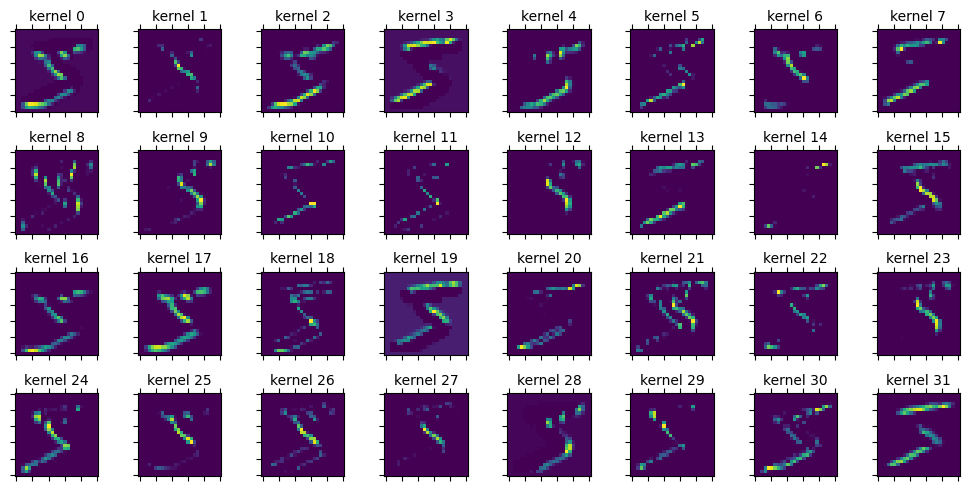

In [24]:
# Convolution 시각화
fig, axes=plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [25]:
# 두번째 레이어 pool 출력층
pooling_activation=activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


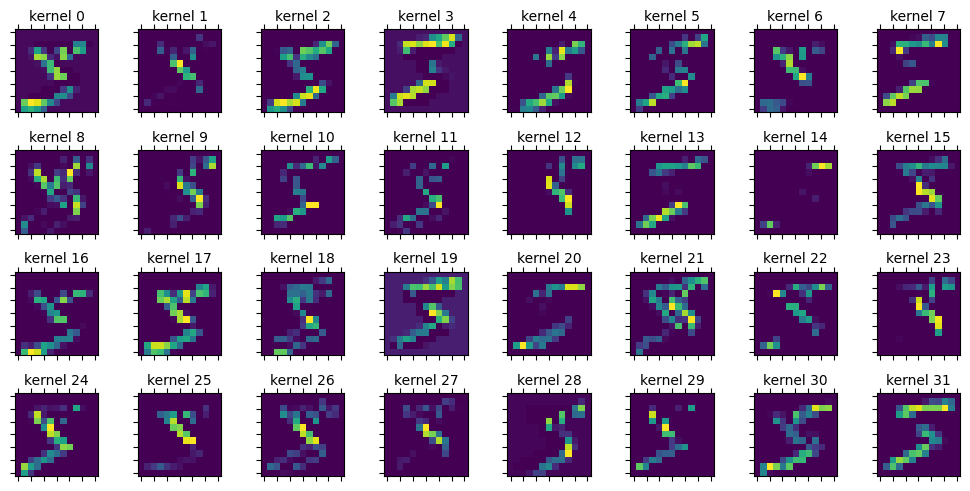

In [26]:
# 시각화
fig, axes=plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

커널별로 출력되는 특성맵 이미지를 시각화하면, 앞 이미지보다 화소가 굵어짐.

- 최대 풀링 -> 인근 픽셀 모아 최대값으로 고정하기 때문에 픽셀 수를 줄이며 특징을 강하게 드러낸다.

### 3. 복잡한 모델 생성

각 레이어를 기준으로 입력이 2개 이상이거나 출력이 2개 이상인 모델, 중간 레이어를 건너뛰고 뒤쪽에 있는 레이어로 출력 텐서를 전달하는 방식의 직접 연결도 가능

**3-1 데이터셋 준비**

In [27]:
import tensorflow as tf
import numpy as np

#mnist 손글씨 이미지 데이터 로드
mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid)=mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [28]:
# 새로운 출력 값 배열 생성 (홀수 : 1, 짝수 : 0)
y_train_odd=[]
for y in y_train:
  if y%2==0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)

y_train_odd=np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [29]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [30]:
# Validation 데이터셋 처리
y_valid_odd=[]
for y in y_valid:
  if y%2==0:
    y_valid_odd.append(0)
  else:
    y_valid_odd.append(1)

y_valid_odd=np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [31]:
# 정규화
x_train=x_train/255.0
x_valid=x_valid/255.0

# 채널 추가
x_train_in=tf.expand_dims(x_train, -1)
x_valid_in=tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


**3-2. Functional API로 다중 입력, 다중 출력 레이어 생성**

- sequential api는 레이어를 층층이 한 줄로 연결할 수밖에 없지만, functional api를 사용하면 다중 입력 또는 다중 출력 같은 구조를 만들 수 있다.

- 아래 코드에서 입력 레이어 input의 경우 Conv2D 레이어와 flatten 레이어의 입력으로 사용된다. 따라서 입력 레이어는 2개의 출력을 갖고 각 출력은 각각 다른 레이어의 입력으로 사용된다. 최종적으로 Concatenate 레이어에서 합쳐진 다음 Dense 레이어를 통과한다. 이렇게 함수의 입력과 출력으로 표현할 수 있어서 자유롭게 모델 구조를 정의할 수 있다.

In [32]:
# Functional API 를 사용하여 모델 생성

inputs=tf.keras.layers.Input(shape=(28, 28, 1))

conv=tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool=tf.keras.layers.MaxPooling2D((2,2))(conv)
flat=tf.keras.layers.Flatten()(pool)

flat_inputs=tf.keras.layers.Flatten()(inputs)
concat=tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs=tf.keras.layers.Dense(10, activation='softmax')(concat)

model=tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 flatten_1 (Flatten)            (None, 5408)         0           ['max_pooling2d[0][0]']          
                                                                                            

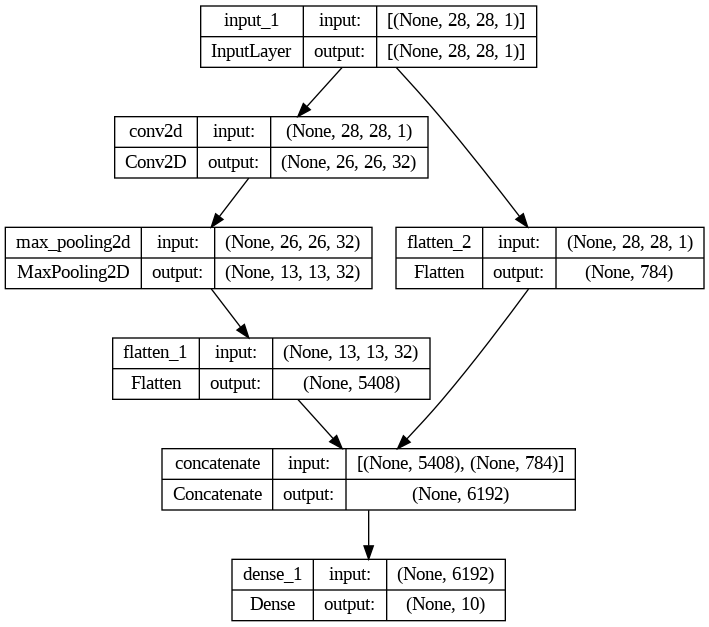

In [33]:
# 모델 구조 출력 및 이미지 파일로 저장
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

In [34]:

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=model.fit(x_train_in, y_train, validation_data=(x_valid, y_valid), epochs=10)

# 모델 성능
val_loss, val_acc=model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1995 - accuracy: 0.9438 - val_loss: 0.0839 - val_accuracy: 0.9741
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0791 - accuracy: 0.9765 - val_loss: 0.0644 - val_accuracy: 0.9800
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0609 - accuracy: 0.9815 - val_loss: 0.0645 - val_accuracy: 0.9796
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0498 - accuracy: 0.9847 - val_loss: 0.0662 - val_accuracy: 0.9779
Epoch 5/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0412 - accuracy: 0.9872 - val_loss: 0.0601 - val_accuracy: 0.9812
Epoch 6/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0357 - accuracy: 0.9892 - val_loss: 0.0609 - val_accuracy: 0.9807
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0305 - accuracy: 0.9905 - val_loss: 0.0556 -

**3-3. 다중 출력 분류 모델**

이번에는 두 가지 서로 다른 분류 문제를 예측하는 다중 출력 모델을 만들어보자. 앞에 만든 짝수, 홀수 정답 배열 사용. 0~9 숫자를 맞추고, 홀짝을 맞추는 분류 문제를 동시에 풀어내는 모델의 정의해보자. 출력 레이어가 2개인 것이 핵심.

In [35]:
# Functional API를 사용해 모델 생성

inputs=tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv=tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool=tf.keras.layers.MaxPooling2D((2,2), name='maxpool_layer')(conv)
flat=tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs=tf.keras.layers.Flatten()(inputs)
concat=tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs=tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs=tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model=tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

In [36]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


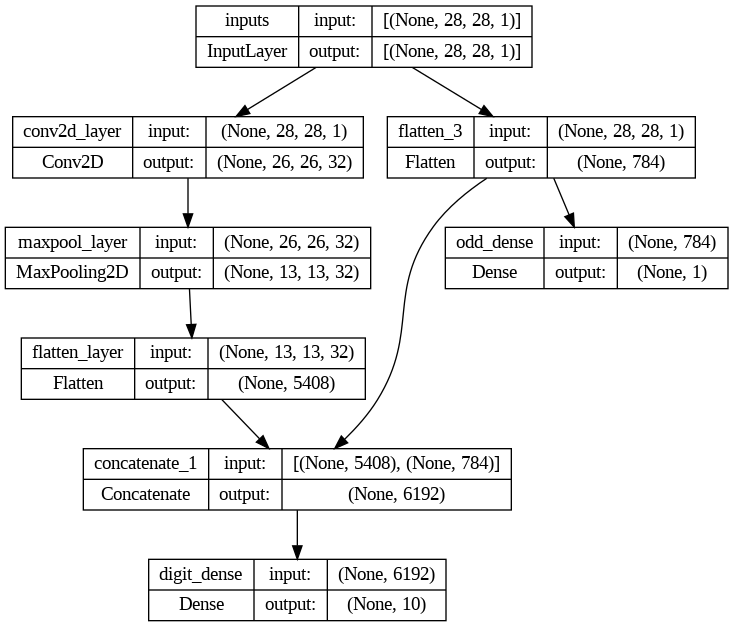

In [37]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

In [38]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss={'digit_dense': 'sparse_categorical_crossentropy', 'odd_dense':'binary_crossentropy'},
              loss_weights={'digit_dense':1, 'odd_dense':0.5}, # loss = 1.0 * sparse_categorical_crossentropy + 0.5 * binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history=model.fit({'inputs':x_train_in},
                  {'digit_dense':y_train, 'odd_dense':y_train_odd},
                   validation_data=({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd}), epochs=10)

# 모델 성능
model.evaluate({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd})

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.3691 - digit_dense_loss: 0.2088 - odd_dense_loss: 0.3206 - digit_dense_accuracy: 0.9406 - odd_dense_accuracy: 0.8676 - val_loss: 0.2246 - val_digit_dense_loss: 0.0864 - val_odd_dense_loss: 0.2764 - val_digit_dense_accuracy: 0.9732 - val_odd_dense_accuracy: 0.8858
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2117 - digit_dense_loss: 0.0761 - odd_dense_loss: 0.2714 - digit_dense_accuracy: 0.9776 - odd_dense_accuracy: 0.8907 - val_loss: 0.2126 - val_digit_dense_loss: 0.0801 - val_odd_dense_loss: 0.2649 - val_digit_dense_accuracy: 0.9742 - val_odd_dense_accuracy: 0.8981
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1900 - digit_dense_loss: 0.0588 - odd_dense_loss: 0.2624 - digit_dense_accuracy: 0.9823 - odd_dense_accuracy: 0.8960 - val_loss: 0.1896 - val_digit_dense_loss: 0.0598 - val_odd_dense_loss: 0.2596 - val_digit_dense_accuracy: 0.9807 -

[0.1822839081287384,
 0.054203785955905914,
 0.25616028904914856,
 0.9842000007629395,
 0.9017000198364258]

정확도 92%. 홀수 여부 판단은 83%의 정확

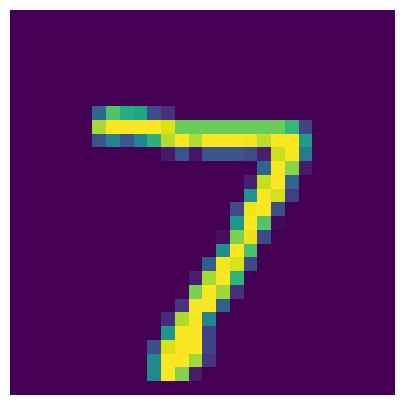

In [39]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx])
  plt.axis('off')
  plt.show()

plot_image(x_valid, 0)

In [40]:
digit_preds, odd_preds=model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 3s 8ms/step
[5.04863783e-13 3.70409703e-09 3.08752064e-08 4.01300485e-06
 1.82340643e-10 1.08107761e-12 1.02855405e-19 9.99995887e-01
 2.56444221e-09 3.20726379e-08]
[0.9995009]


In [41]:
digit_labels=np.argmax(digit_preds, axis=1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [42]:
odd_labels=(odd_preds>0.5).astype(np.int).reshape(1, -1)[0]
odd_labels[0:10]

<ipython-input-42-b68f671b10f9>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  odd_labels=(odd_preds>0.5).astype(np.int).reshape(1, -1)[0]


array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

**3-4 전이 학습**

- 앞에서 훈련한 모델 일부를 가져와 최종 출력층만 새롭게 추가해 모델을 재구성할 수 있다. 이처럼 기존에 학습된 모델을 사용해 새로운 모델을 만드는 것을 Transfer Learning 이라고 한다. (base 층을 재사용해 Top 층을 변경)

- 앞에서 학습한 모델에서 입력 레이어부터 flatten_layer라는 name을 갖는 Flatten 층까지 해당하는 부분을 따로 추출해 base_model로 만든다. 모델 개요를 보면 (28, 28, 1) 이미지 받아 5408개의 피처로 특징을 추출해 출력하는 모델이다.

In [43]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output=model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model=tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()   

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


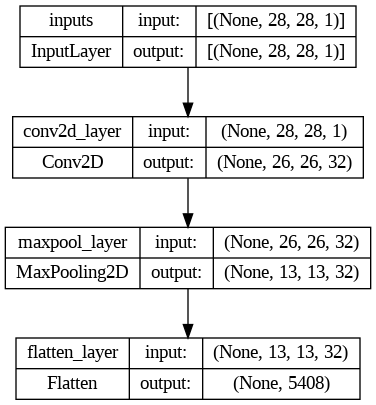

In [44]:
tf.keras.utils.plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [45]:
# Sequential API 적용
digit_model=tf.keras.Sequential([
    base_model, tf.keras.layers.Dense(10, activation='softmax')
])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


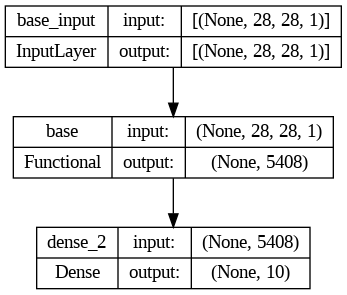

In [46]:
tf.keras.utils.plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

In [47]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=digit_model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1289 - accuracy: 0.9635 - val_loss: 0.0636 - val_accuracy: 0.9808
Epoch 2/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0568 - accuracy: 0.9826 - val_loss: 0.0516 - val_accuracy: 0.9822
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0441 - accuracy: 0.9864 - val_loss: 0.0483 - val_accuracy: 0.9829
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0345 - accuracy: 0.9892 - val_loss: 0.0480 - val_accuracy: 0.9840
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0278 - accuracy: 0.9917 - val_loss: 0.0536 - val_accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0236 - accuracy: 0.9924 - val_loss: 0.0490 - val_accuracy: 0.9840
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0192 - accuracy: 0.9938 - val_loss: 0.0583 -

In [48]:
# 베이스 모델의 가중치 고정 (Freeze Model)

base_model_frozen=tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable=False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [49]:
# Functional API 적용
dense_output=tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen=tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [50]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=digit_model_frozen.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1167 - accuracy: 0.9684 - val_loss: 0.0565 - val_accuracy: 0.9816
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0479 - accuracy: 0.9856 - val_loss: 0.0595 - val_accuracy: 0.9802
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0354 - accuracy: 0.9895 - val_loss: 0.0456 - val_accuracy: 0.9849
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0280 - accuracy: 0.9912 - val_loss: 0.0511 - val_accuracy: 0.9832
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0220 - accuracy: 0.9935 - val_loss: 0.0498 - val_accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0173 - accuracy: 0.9951 - val_loss: 0.0482 - val_accuracy: 0.9844
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0153 - accuracy: 0.9955 - val_loss: 0.0540 - val_ac

In [51]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정 (Freeze Layer)

base_model_frozen2=tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable=False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


dense 레이어 연결

In [52]:
# Functional API 적용
dense_output2=tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2=tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [53]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=digit_model_frozen2.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1149 - accuracy: 0.9689 - val_loss: 0.0575 - val_accuracy: 0.9818
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0485 - accuracy: 0.9856 - val_loss: 0.0527 - val_accuracy: 0.9822
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0347 - accuracy: 0.9896 - val_loss: 0.0548 - val_accuracy: 0.9827
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0269 - accuracy: 0.9917 - val_loss: 0.0504 - val_accuracy: 0.9845
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0225 - accuracy: 0.9931 - val_loss: 0.0490 - val_accuracy: 0.9850
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0174 - accuracy: 0.9949 - val_loss: 0.0543 - val_accuracy: 0.9836
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0149 - accuracy: 0.9957 - val_loss: 0.0515 - val_a